In [38]:
import pandas as pd
import os

mainpath ="/home/israel/Documentos/Machine-learning/python-ml-course/datasets"
filename = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath,filename)

In [39]:
data = pd.read_csv(fullpath)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [40]:
#filas,columnas
data.shape 

(1309, 14)

In [41]:
#ultimos elementos del dataframe
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [42]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

Resumen de los estadísticos básicos de las variables numéricas

In [43]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Si solo queremos información de una una columna

In [44]:
data.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

Si queremos un estadístico en particular

In [45]:
data.age.mean()

29.8811345124283

In [46]:
# Lista con los tipos de datos

data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Missing Values

Una forma de comprobar si en una columna existen valores nulos, es invocar la función *isnull*

In [47]:
pd.isnull(data["body"])

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool

In [48]:
# como array
pd.isnull(data["body"]).values

array([ True,  True,  True, ..., False,  True,  True])

podemos sumar los True, Rec: True-->1, False-->0

In [49]:
pd.isnull(data["body"]).values.sum()

1188

Tambien podemos hacernos la pregunta cotrearia,si no es nulo

In [50]:
pd.notnull(data["body"]).values

array([False, False, False, ...,  True, False, False])

La falta de datos en general se presenta por dos motivos

* Extracción de los datos
* Recolección de los datos

A la hora de gestionar datos faltantes existen variadas alternativas

**Borrar los valores que faltan**

In [84]:
data.dropna(axis = 0,how = "all").head()

# Axis=0--> borra filas, axis=1--> borra columna, how='all'--> solamente borrara la fila si todos 
#los elementos de dicha fila contienen NaN

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0


In [52]:
data2 = data

In [53]:
data2.dropna(axis = 0, how = "any")

# Este es caso claramente fue mas extremista

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


**Computo de los valores faltantes**

En lugar de borrar los datos podriamos inferirlos y añadir valores, el *como* inferirlos estos valores (Promedio, agregar strings, agregar ceros, etc) dependera del contexto de la información que estemos analizando.

In [54]:
# comenzemos rellenando valores faltantes con ceros

data3 = data
data3.fillna(0).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


In [55]:
data4 = data
data4.fillna("Desconocido").head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,Desconocido,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Desconocido,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,Desconocido,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,Desconocido,Desconocido,"Montreal, PQ / Chesterville, ON"


Podemos ser un poco mas especificos y elegir el relleno de cada columna

In [56]:
data5 = data
data["body"] = data5["body"].fillna(0)
data5["home.dest"] = data5["home.dest"].fillna("Desconocido")
data5.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,0.0,Desconocido
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,0.0,Desconocido


Tambien podriamos reemplazar NaN por cantidades estadísticas

In [57]:
data5["age"].fillna(data["age"].mean())

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

*fillna* cuenta con un par de parámetros que pueden ser de utilidad

In [58]:
data5["age"].fillna(method = "ffill")

#ffill:fordward fill, introduce el valor mas cercano
#que encuentra hacia adelante en la lista

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [59]:
data5["age"].fillna(method = "backfill")

# lo mismo pero hacia atras

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

## Variables dummy

Consideremos el género de las de los pasajetos del titanic

In [60]:
data["sex"].head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [61]:
dummy_sex = pd.get_dummies(data["sex"], prefix = "sex")

In [62]:
dummy_sex.head()

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


Estas dos nuevas columnas no sirven para nada si no las adjuntamos en el dataset original

In [63]:
data = data.drop(["sex"], axis = 1)

In [64]:
column_name = data.columns.values.tolist()

In [65]:
column_name

['pclass',
 'survived',
 'name',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [66]:
data = pd.concat([data,dummy_sex], axis = 1)

In [67]:
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0


Podemos resumir este procedimiento en una función

In [75]:
def createDummies(df,var_name):
    dummy = pd.get_dummies(df[var_name], prefix = var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df,dummy], axis = 1)
    return df

In [83]:
data3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"


In [82]:
createDummies(data3,"sex").head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0


In [78]:
data["sex_female"].sum()

466

In [79]:
data["sex_male"].sum()

843

## Dummy Data Sets

Podemos crear un conjunto de datos ficticios usando pandas

In [85]:
import numpy as np
n = 1000000

data = pd.DataFrame(
    
    {
        "A" : np.random.randn(n),
        "B" : 2.5 + 1.5*np.random.randn(n),
        "C" : np.random.uniform(5,32,n)
    }

)

In [88]:
data.shape

(1000000, 3)

In [87]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000697,2.499868,18.498041
std,1.001163,1.500138,7.787613
min,-4.745794,-4.181860,5.000033
25%,-0.676414,1.488155,11.757117
50%,0.000036,2.500581,18.493133
75%,0.675115,3.511527,25.235367
max,4.753277,9.349244,31.999994


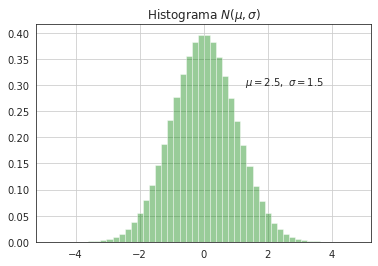

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

plt.figure()

n, bins, patches = plt.hist(data["A"], 50, density = 1, facecolor = "g", alpha = 0.4)
plt.title(r"Histograma $N(μ,σ)$")
plt.text(1.3,0.30, r"$μ = 2.5, \ σ = 1.5$")
plt.grid()
plt.show()


## Plots y visualización de los datos


In [118]:
mainpath = "/home/israel/Documentos/Machine-learning/python-ml-course/datasets"
data = pd.read_csv(mainpath +"/customer-churn-model/customer churn model.txt")

In [119]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


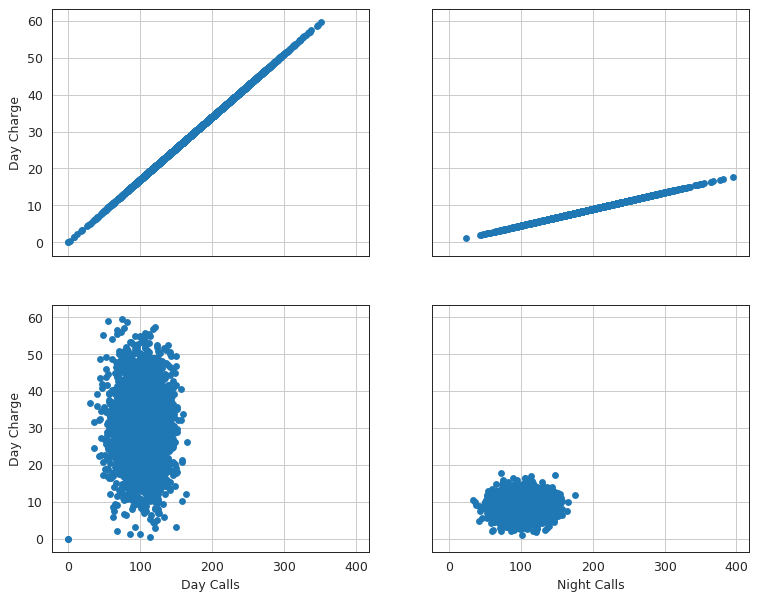

In [139]:

figure, axs = plt.subplots(2,2,sharex = True, sharey = True, figsize = (10,8), dpi = 90)

data.plot(kind = "scatter", x = "Day Mins", y = "Day Charge", ax = axs[0][0], grid = True)
data.plot(kind = "scatter", x = "Night Mins", y = "Night Charge", ax = axs[0][1], grid  = True)
data.plot(kind = "scatter", x = "Day Calls", y = "Day Charge", ax = axs[1][0], grid = True)
data.plot(kind = "scatter", x = "Night Calls", y = "Night Charge", ax = axs[1][1], grid = True)

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

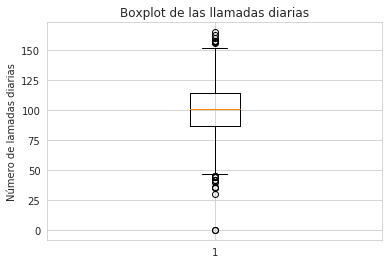

In [147]:
sns.set_style("whitegrid")
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de lamadas diarias")
plt.title("Boxplot de las llamadas diarias")